# Part 1: Viewing Raw Data

For Part 1 of the Time Series Analysis, this notebook will graphically represent Apple Stock data in different formats. No analysis will be done, but there will be comments on the visual nature of the graphs. The data is constrained to 2017 stock data. Thus, in the final parts, this project will evaluate the closeness between the current day stock and the statistic models

* Open Price vs Time 
* Close Price vs Time
* High Price vs Time
* Low Price vs Time
* Price Change vs Time
* Percentage Price Change vs Time

The Stock Data used in this project is from a Kaggle Dataset. This data set can be found [here](https://www.kaggle.com/borismarjanovic/price-volume-data-for-all-us-stocks-etfs/data#aac.us.txt)

### Loading Data

In [78]:
import matplotlib.pyplot as plt
import pandas as pd
import os


#I tooke the appl stock data and moved it into a more convient file location
pathToData = "StockData\AppleStock.txt"

#Check if there is a valid file in directory
if(os.path.isfile(pathToData)):
    print("Path Found")
    data = pd.read_csv(pathToData, sep=",")
else:
    print("Path Not Found")

Path Found


In [39]:
#The data is split along the following metrics with valid data:
#Date, Open, High, Low, Close, Volume
data[0:10]

,Date,Open,High,Low,Close,Volume,OpenInt
0,1984-09-07,0.42388,0.42902,0.41874,0.42388,23220030,0
1,1984-09-10,0.42388,0.42516,0.41366,0.42134,18022532,0
2,1984-09-11,0.42516,0.43668,0.42516,0.42902,42498199,0
3,1984-09-12,0.42902,0.43157,0.41618,0.41618,37125801,0
4,1984-09-13,0.43927,0.44052,0.43927,0.43927,57822062,0
5,1984-09-14,0.44052,0.45589,0.44052,0.44566,68847968,0
6,1984-09-17,0.45718,0.46357,0.45718,0.45718,53755262,0
7,1984-09-18,0.45718,0.46103,0.44052,0.44052,27136886,0
8,1984-09-19,0.44052,0.44566,0.43157,0.43157,29641922,0
9,1984-09-20,0.43286,0.43668,0.43286,0.43286,18453585,0


### Simple Plot of Data

In [40]:
datesData = data["Date"].tolist()
openPriceData = data["Open"].tolist() 
highPricedata = data["High"].tolist()
lowPricedata = data["Low"].tolist()
closePricedata = data["Close"].tolist()

#There is 8364 days worth of apple data. So let us trim that data for the last 
#10 years or 3650 data points
print(len(datesData))
frontSlice = 8364 - 3650
endSlice = 8364
trimDatesData = datesData[frontSlice:endSlice]
trimOpenPriceData = openPriceData[frontSlice:endSlice]
trimHighPriceData = highPricedata[frontSlice:endSlice]
trimLowPriceData = lowPricedata[frontSlice:endSlice]
trimClosePriceData = closePricedata[frontSlice:endSlice]

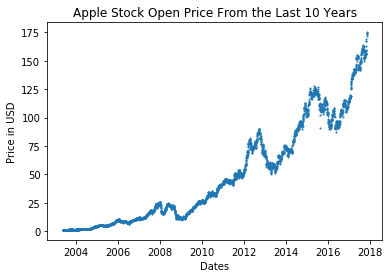

In [71]:
#Plotting Open Price vs Time
fig, ax = plt.subplots()
plt.plot_date(trimDatesData, trimOpenPriceData, markersize = 1)
plt.title("Apple Stock Open Price From the Last 10 Years")
plt.xlabel("Dates")
plt.ylabel("Price in USD")
plt.show()

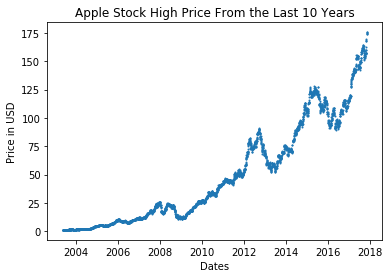

In [72]:
#Plotting High Price vs Time
fig, ax = plt.subplots()
plt.plot_date(trimDatesData, trimHighPriceData, markersize = 1)
plt.title("Apple Stock High Price From the Last 10 Years")
plt.xlabel("Dates")
plt.ylabel("Price in USD")
plt.show()

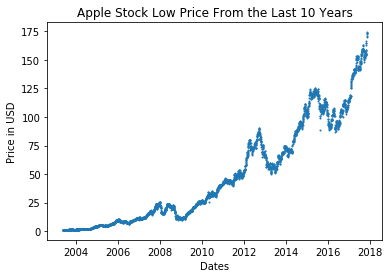

In [73]:
#Plotting Low Price vs Time
fig, ax = plt.subplots()
plt.plot_date(trimDatesData, trimLowPriceData, markersize = 1)
plt.title("Apple Stock Low Price From the Last 10 Years")
plt.xlabel("Dates")
plt.ylabel("Price in USD")
plt.show()

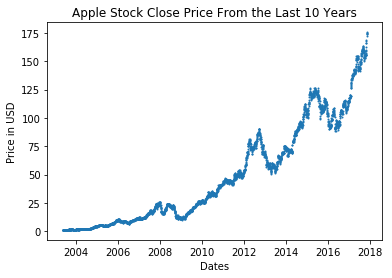

In [74]:
#Plotting Close Price vs Time
fig, ax = plt.subplots()
plt.plot_date(trimDatesData, trimClosePriceData, markersize = 1)
plt.title("Apple Stock Close Price From the Last 10 Years")
plt.xlabel("Dates")
plt.ylabel("Price in USD")
plt.show()

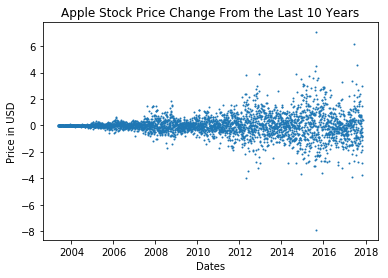

In [75]:
#Plotting the Net Growth from the Open and Closing Prices
trimNetPriceDiffData = []
for i in range(len(trimDatesData)):
    netDiff = trimOpenPriceData[i] - trimClosePriceData[i]
    trimNetPriceDiffData.append(netDiff)

fig, ax = plt.subplots()
plt.plot_date(trimDatesData, trimNetPriceDiffData, markersize = 1)
plt.title("Apple Stock Absolute Price Change From the Last 10 Years")
plt.xlabel("Dates")
plt.ylabel("Price in USD")
plt.show()

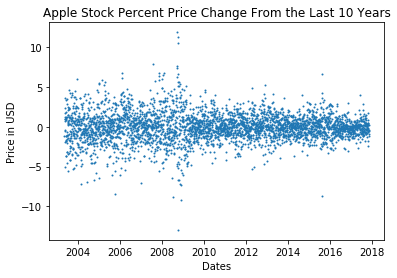

In [77]:
#Plotting the Percent Growth vs Time

trimNetPriceDiffData = []
for i in range(len(trimDatesData)):
    netDiff = trimOpenPriceData[i] - trimClosePriceData[i]
    trimNetPriceDiffData.append(netDiff)
#Compare the Net Price Change with the original price
trimPercentDiffData = []
for i in range(len(trimDatesData)):
    percentDiff = (trimNetPriceDiffData[i]/trimOpenPriceData[i]) * 100
    trimPercentDiffData.append(percentDiff)
    
fig, ax = plt.subplots()
plt.plot_date(trimDatesData, trimPercentDiffData, markersize = 1)
plt.title("Apple Stock Percent Price Change From the Last 10 Years")
plt.xlabel("Dates")
plt.ylabel("Price in USD")
plt.show()    